In [1]:
%matplotlib inline

In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import math
import geopandas as gpd

from cdo import * 
import os
os.environ['HDF5_DISABLE_VERSION_CHECK'] = "1"

cdo = Cdo()
cdo.debug = False

In [4]:
ds = xr.open_dataset('sample.nc', engine='netcdf4', decode_coords="all")
ds = ds.rio.write_crs(4326)
# Drop time variables; for some reason clipping these is problematic...
ds = ds[['harvested_area','harvest','production']]
ds

<xarray.Dataset>
Dimensions:         (time: 4, crop: 26, latitude: 280, longitude: 720)
Coordinates:
  * longitude       (longitude) float64 -179.8 -179.2 -178.8 ... 179.2 179.8
  * latitude        (latitude) float64 83.75 83.25 82.75 ... -55.25 -55.75
  * time            (time) int32 2021 2021 2022 2022
    spatial_ref     int64 0
Dimensions without coordinates: crop
Data variables:
    harvested_area  (time, crop, latitude, longitude) float32 ...
    harvest         (time, crop, latitude, longitude) float32 ...
    production      (time, crop, latitude, longitude) float32 ...

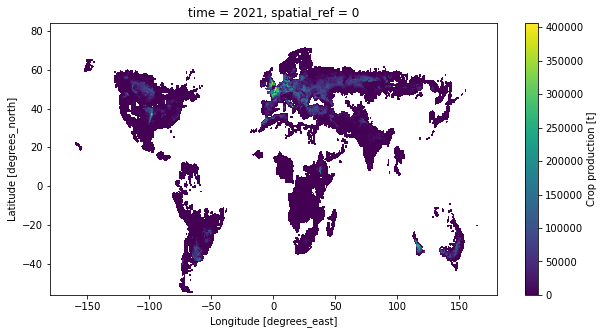

In [5]:
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(10, 5))
ds.production[0,0,:,:].plot(ax=axes)

In [6]:
shapefile = '/home/user/Downloads/geo/gadm_0/gadm36_0.shp'
sf = gpd.read_file(shapefile)
sf.head()

,GID_0,NAME_0,geometry
0,ABW,Aruba,"POLYGON ((-69.97820 12.46986, -69.97847 12.469..."
1,AFG,Afghanistan,"POLYGON ((68.52644 31.75435, 68.53852 31.75457..."
2,AGO,Angola,"MULTIPOLYGON (((11.73347 -16.67255, 11.73347 -..."
3,AIA,Anguilla,"MULTIPOLYGON (((-63.42375 18.58903, -63.42375 ..."
4,ALA,Åland,"MULTIPOLYGON (((21.32195 59.74986, 21.32195 59..."


<AxesSubplot:>

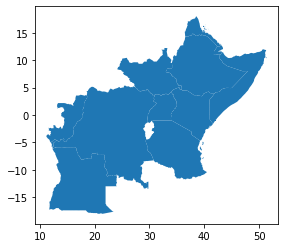

In [13]:
countries = ['Ethiopia','South Sudan','Somalia','Kenya', 'Eritrea', 'Uganda', 'Djibouti','Tanzania','Zaire','Angola',
            'Republic of Congo','Democratic Republic of the Congo']
countries_shp = sf[sf['NAME_0'].isin(countries)]
countries_shp.plot()

In [14]:
ds_c = ds.rio.clip(countries_shp.geometry)

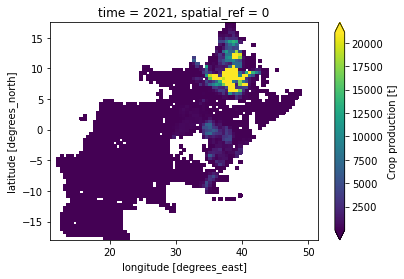

In [15]:
ds_c.isel(crop=0, time=0)['production'].plot(robust=True)

In [16]:
new_lon = np.linspace(ds_c.longitude[0], ds_c.longitude[-1], round(ds_c.dims["longitude"] * 5))
new_lat = np.linspace(ds_c.latitude[0], ds_c.latitude[-1], round(ds_c.dims["latitude"] * 5))

In [17]:
ds2 = ds_c.interp(latitude=new_lat, longitude=new_lon)
ds2['production'] = ds2['production'] / 5

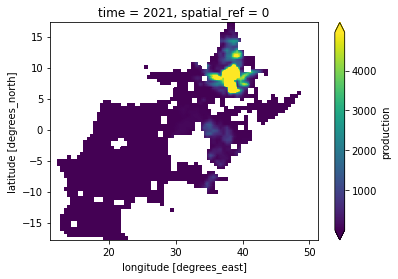

In [18]:
ds2.isel(crop=0, time=0)['production'].plot(robust=True)

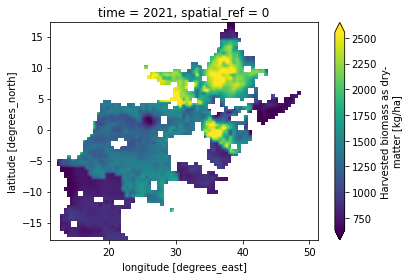

In [19]:
ds2.isel(crop=0, time=0)['harvest'].plot(robust=True)